Populating the interactive namespace from numpy and matplotlib
hist_values (array([44726, 10898,  5202,  2059,   960,   469,   147,    35,    13,
           7], dtype=int64), array([0.        , 0.31878545, 0.6375709 , 0.95635634, 1.27514179,
       1.59392724, 1.91271269, 2.23149813, 2.55028358, 2.86906903,
       3.18785448]))
brick


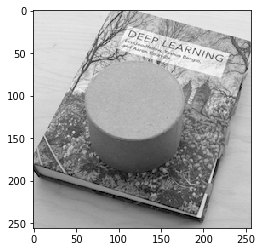

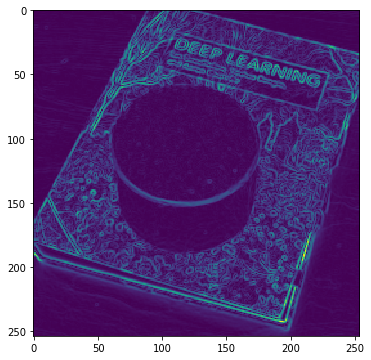

In [37]:
import numpy as np
import os, sys
sys.path.append('..')
get_ipython().run_line_magic('pylab', 'inline')
from util.filters import filter_2d
from util.image import convert_to_grayscale

# im = imread('../data/medium_1/brick/brick_3.jpg')
# im = imread('../data/medium_1/ball/ball_4.jpg')
im = imread('../data/medium_1/cylinder/cylinder_2.jpg')
gray = convert_to_grayscale(im/255.)
plt.imshow(gray, cmap = 'gray')
Kx = np.array([[1, 0, -1],
               [2, 0, -2],
               [1, 0, -1]])

Ky = np.array([[1, 2, 1],
               [0, 0, 0],
               [-1, -2, -1]])

Gx = filter_2d(gray, Kx)
Gy = filter_2d(gray, Ky)

#Compute Gradient Magnitude and Direction:
G_magnitude = np.sqrt(Gx**2+Gy**2)


# Kx = np.array([[1, 0, -1],
#                [2, 0, -2],
#                [1, 0, -1]])

# Ky = np.array([[1, 2, 1],
#                [0, 0, 0],
#                [-1, -2, -1]])

# Gmag_x = filter_2d(G_magnitude, Kx)
# Gmag_y = filter_2d(G_magnitude, Ky)
# Gmag_ = np.sqrt(Gx**2+Gy**2)
fig = figure(0, (6,6))
plt.imshow(G_magnitude)
G_direction = np.arctan2(Gy, Gx)

G_mean = np.mean(G_magnitude)
#             imshow(G_magnitude)
#             colorbar()
labels = ['brick', 'ball', 'cylinder']

G_max = np.max(G_magnitude)
# limits = 0. * G_max
difference = G_max - G_mean
y_coords, x_coords = np.where(G_magnitude > difference)
hist_values = np.histogram(G_magnitude)
print("hist_values",hist_values)
#             print(len(x_coords))

if difference > 0 and difference <=1.72:
    print(labels[1])
elif difference > 1.72 and difference <= 2.045:
    print(labels[2])
else:
    print(labels[0])


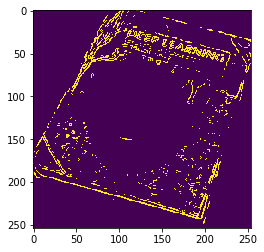

In [38]:
g_max = np.max(G_magnitude)
G_maxed = G_magnitude > g_max*0.3
imshow(G_maxed)